# Project details - classification

**Background**: You are working as a risk analyst with a bank. Apart from the other banking and loan services, the bank also provides credit card services which is a very important source of revenue for the bank. The bank wants to understand the demographics and other characteristics of its customers that accept a credit card offer and that do not accept a credit card.
Usually the observational data for these kinds of problems is somewhat limited in that often the company sees only those who respond to an offer. To get around this, the bank designs a focused marketing study, with 18,000 current bank customers. This focused approach allows the bank to know who does and does not respond to the offer, and to use existing demographic data that is already available on each customer.

**Objective**: The task is to build a model that will **provide insight into why some bank customers accept credit card offers.** There are also other potential areas of opportunities that the bank wants to understand from the data.
Your senior management has also posted these other questions that will help them better understand their customers.

**Data**: Consists of information on 18,000 current bank customers in the study. 

- **Customer Number**: A sequential number assigned to the customers (this column is hidden and excluded – this unique identifier will not be used directly).
- **Offer Accepted**: Did the customer accept (Yes) or reject (No) the offer. Reward: The type of reward program offered for the card.
- **Mailer Type**: Letter or postcard.
- **Income Level**: Low, Medium or High.
- **#Bank Accounts Open**: How many non-credit-card accounts are held by the customer.
- **Overdraft Protection**: Does the customer have overdraft protection on their checking account(s) (Yes or No).
- **Credit Rating**: Low, Medium or High.
- **#Credit Cards Held**: The number of credit cards held at the bank.
- **#Homes Owned**: The number of homes owned by the customer.
- **Household Size**: Number of individuals in the family.
- **Own Your Home**: Does the customer own their home? (Yes or No).
- **Average Balance**: Average account balance (across all accounts over time). **Q1, Q2, Q3 and Q4**
- **Balance**: Average balance for each quarter in the last year


# Import Files


In [1]:
import pandas as pd
import numpy as np
import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from matplotlib.colors import BASE_COLORS
sns.set_theme(style="ticks", color_codes=True)



# import sys
# import statistics
import math

# sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#### To imoprt MySQL in Python
import pymysql
#from sqlalchemy import create_engine
import getpass  # To get the password without showing the input
password = getpass.getpass()

Import csv, rename columns, save file to open in SQL

# 1. Data Exploration
#### Exploration of data types, headers, general information and NaN values   

In [3]:
data = pd.read_excel('/home/mono/gitHub/Ironweek5/classification/creditcardmarketing_clean.xlsx')
data.head(20)

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,n_Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,n_Credit_Cards_Held,n_Homes_Owned,Household_Size,Own_Your_Home,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
5,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0
6,7,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,283.75,468.0,188.0,347.0,132.0
7,8,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,278.50,132.0,391.0,285.0,306.0
8,9,No,Air Miles,Postcard,Medium,1,No,Low,2,1,4,Yes,1005.00,894.0,891.0,882.0,1353.0
9,10,No,Air Miles,Letter,High,2,No,Low,3,2,4,Yes,974.25,1814.0,1454.0,514.0,115.0


In [4]:
data.shape

(18000, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_Number       18000 non-null  int64  
 1   Offer_Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer_Type           18000 non-null  object 
 4   Income_Level          18000 non-null  object 
 5   n_Bank_Accounts_Open  18000 non-null  int64  
 6   Overdraft_Protection  18000 non-null  object 
 7   Credit_Rating         18000 non-null  object 
 8   n_Credit_Cards_Held   18000 non-null  int64  
 9   n_Homes_Owned         18000 non-null  int64  
 10  Household_Size        18000 non-null  int64  
 11  Own_Your_Home         18000 non-null  object 
 12  Average_Balance       17976 non-null  float64
 13  Q1_Balance            17976 non-null  float64
 14  Q2_Balance            17976 non-null  float64
 15  Q3_Balance         

* In this first view of the data we can cosider that the   column without name (index) and "Customer_Number".   

### Standardizing Headers

In [7]:
def rename_cols(df):
    """
    This function takes a pandas dataframe and changes its column names in place to lowercase and replacing
    spaces with underscores. Simply write
    >>> rename_cols(data)
    """
    df.columns = df.columns.str.replace(" ","_").str.lower()
    df.columns = df.columns.str.replace("#","n")

In [9]:
rename_cols(data)

In [10]:
data.head(2)

,customer_number,offer_accepted,reward,mailer_type,income_level,n_bank_accounts_open,overdraft_protection,credit_rating,n_credit_cards_held,n_homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0


In [ ]:
### Setting the data types in Columns

* This function converts values to boolean.

```
def yesnotobool(x):
    if x in ('Yes', True):
        return True
    elif x in ('No', False):
        return False
    else:
        return np.nan
    pass
    
```
    
    
    
``` 

data['offer_accepted'] = data['offer_accepted'].apply(yesnotobool)
data['overdraft_protection'] = data['overdraft_protection'].apply(yesnotobool)
data['own_your_home'] = data['own_your_home'].apply(yesnotobool)   
```

In [57]:
data.dtypes

customer_number           int64
offer_accepted             bool
reward                   object
mailer_type              object
income_level             object
n_bank_accounts_open      int64
overdraft_protection       bool
credit_rating            object
n_credit_cards_held       int64
n_homes_owned             int64
household_size            int64
own_your_home              bool
average_balance          object
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object

* To convert floats
- data['average_balance'] = data['average_balance'].str.replace(',','.')

- data['average_balance'] = data['average_balance'].astype(np.float)

### Checking for NaN values 

In [12]:

pd.DataFrame(round(data.isna().sum()/len(data),4)*100)

,0
customer_number,0.00
offer_accepted,0.00
reward,0.00
mailer_type,0.00
income_level,0.00
n_bank_accounts_open,0.00
overdraft_protection,0.00
credit_rating,0.00
n_credit_cards_held,0.00
n_homes_owned,0.00


**NaN values:** The number of NAN values is not significant in these features. Let's see how is the correlation of these features in the further steps. 
verage_Balance 	0.13, 
Q1_Balance 	0.13
Q2_Balance 	0.13
Q3_Balance 	0.13
Q4_Balance 	0.13

In [13]:
# Checking percentage of null values
data.isna().sum()/data.shape[0]*100

customer_number         0.000000
offer_accepted          0.000000
reward                  0.000000
mailer_type             0.000000
income_level            0.000000
n_bank_accounts_open    0.000000
overdraft_protection    0.000000
credit_rating           0.000000
n_credit_cards_held     0.000000
n_homes_owned           0.000000
household_size          0.000000
own_your_home           0.000000
average_balance         0.133333
q1_balance              0.133333
q2_balance              0.133333
q3_balance              0.133333
q4_balance              0.133333
dtype: float64

In [15]:
# Fill nan values with means
for i in ('average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance'):
    data[i] = data[i].fillna(np.mean(data[i]))

In [16]:
# Checking percentage of null values
data.isna().sum()/data.shape[0]*100

customer_number         0.0
offer_accepted          0.0
reward                  0.0
mailer_type             0.0
income_level            0.0
n_bank_accounts_open    0.0
overdraft_protection    0.0
credit_rating           0.0
n_credit_cards_held     0.0
n_homes_owned           0.0
household_size          0.0
own_your_home           0.0
average_balance         0.0
q1_balance              0.0
q2_balance              0.0
q3_balance              0.0
q4_balance              0.0
dtype: float64

In [ ]:
# data = data.convert_dtypes()

# data.dtypes

In [81]:
X_num = data.select_dtypes(include=np.number)
X_cat = data.select_dtypes(include=(np.object, np.bool))
# We check no data is lost in the split
print(data.shape, X_num.shape, X_cat.shape)

(18000, 17) (18000, 10) (18000, 7)


### Data wrangling

Numerical variables 

In [83]:
X_num.head()

,customer_number,n_bank_accounts_open,n_credit_cards_held,n_homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,2,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,3,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0


In [88]:
# We drop useless columns

# customer_number is just an index so not a predictor
X_num = X_num.drop('customer_number', axis=1)
# average_balance is just the average of the sum of the 4 quarterly balances so it doesn't add any info
X_num = X_num.drop('average_balance', axis=1)

Check for correlations in numerical variables

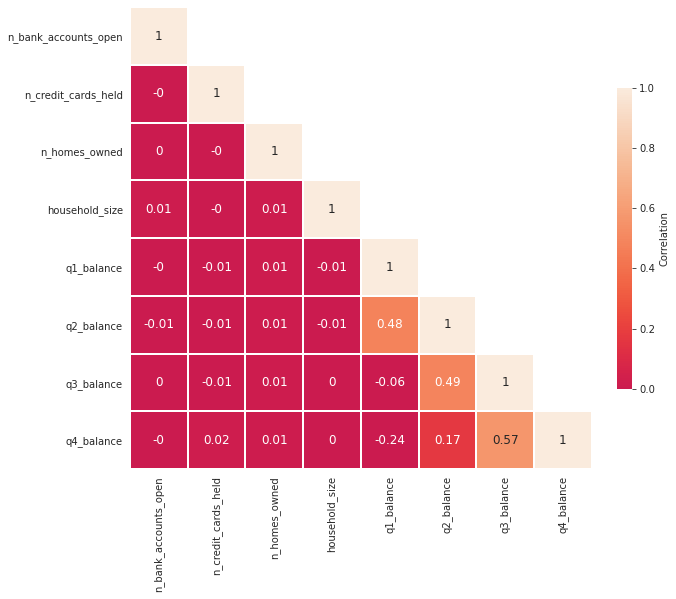

In [89]:
def plot_heatmap(df, size):
    corr = df.corr().round(2)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask, k=1)] = True

    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(size, size))
        ax = sns.heatmap(corr, mask=mask, center=0, vmin=0, vmax=1, annot=True, square=True,
                         linewidths=1, annot_kws={'fontsize':'large'}, cmap='rocket',
                         cbar_kws={"orientation": "vertical", 'fraction': 0.03, 'label': 'Correlation'}
                        )

plot_heatmap(X_num, 9)

In [91]:
# For the moment we try to use the following variables as predictors:
#     * Number of bank accounts open --> n_bank_accounts_open
#     * Number of credit cards held --> n_credit_cards_held

In [92]:
X_num = X_num.drop('n_homes_owned', axis=1)
X_num = X_num.drop('household_size', axis=1)
X_num = X_num.drop('q1_balance', axis=1)
X_num = X_num.drop('q2_balance', axis=1)
X_num = X_num.drop('q3_balance', axis=1)
X_num = X_num.drop('q4_balance', axis=1)

Standardize

In [99]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_num)
X_num_standardized = pd.DataFrame(transformer.transform(X_num))
X_num_standardized

,0,1
0,-0.541343,0.121081
1,-0.541343,0.121081
2,1.575115,0.121081
3,1.575115,-1.133645
4,-0.541343,0.121081
...,...,...
17995,-0.541343,-1.133645
17996,-0.541343,1.375807
17997,-0.541343,0.121081
17998,-0.541343,2.630533


Categorical variables

In [100]:
X_cat

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,False,Air Miles,Letter,High,False,High,False
1,False,Air Miles,Letter,Medium,False,Medium,True
2,False,Air Miles,Postcard,High,False,Medium,True
3,False,Air Miles,Letter,Medium,False,High,False
4,False,Air Miles,Letter,Medium,False,Medium,True
...,...,...,...,...,...,...,...
17995,False,Cash Back,Letter,High,False,Low,True
17996,False,Cash Back,Letter,High,False,Low,True
17997,False,Cash Back,Letter,High,False,Low,False
17998,False,Cash Back,Letter,Medium,False,Medium,True


In [105]:
def column_uniques(df):
    """
    This function takes a dataframe and shows the unique elements for every column
    """
    for q, v in enumerate(df):
        x = [v, str(len(df.iloc[:,q].unique())) + ' values', df.iloc[:,q].unique().tolist()]
        print(x)
    pass
column_uniques(X_cat)

['reward', '3 values', ['Air Miles', 'Cash Back', 'Points']]
['mailer_type', '2 values', ['Letter', 'Postcard']]
['income_level', '3 values', ['High', 'Medium', 'Low']]
['overdraft_protection', '2 values', [False, True]]
['credit_rating', '3 values', ['High', 'Medium', 'Low']]
['own_your_home', '2 values', [False, True]]


Define the target Y and drop it from the features' table

In [104]:
Y = X_cat['offer_accepted']
X_cat = X_cat.drop('offer_accepted', axis=1)

In [116]:
# One-Hot encoding using get_dummies
X_cat_encoded = pd.get_dummies(X_cat)
X_cat_encoded

,overdraft_protection,own_your_home,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,income_level_High,income_level_Low,income_level_Medium,credit_rating_High,credit_rating_Low,credit_rating_Medium
0,False,False,1,0,0,1,0,1,0,0,1,0,0
1,False,True,1,0,0,1,0,0,0,1,0,0,1
2,False,True,1,0,0,0,1,1,0,0,0,0,1
3,False,False,1,0,0,1,0,0,0,1,1,0,0
4,False,True,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,False,True,0,1,0,1,0,1,0,0,0,1,0
17996,False,True,0,1,0,1,0,1,0,0,0,1,0
17997,False,False,0,1,0,1,0,1,0,0,0,1,0
17998,False,True,0,1,0,1,0,0,0,1,0,0,1


In [117]:
X_cat.dtypes

reward                  object
mailer_type             object
income_level            object
overdraft_protection      bool
credit_rating           object
own_your_home             bool
dtype: object

Some exploratory plots

In [73]:
def plot_box_grid(df):
    fig = plt.figure(figsize=(15,15))
    axes = []
    for count, val in enumerate(df):
        axes.append(fig.add_subplot(math.ceil(df.shape[1]/3), 3, count+1))
        sns.boxplot(x=df[val], ax=axes[count], color='turquoise')
    plt.plot

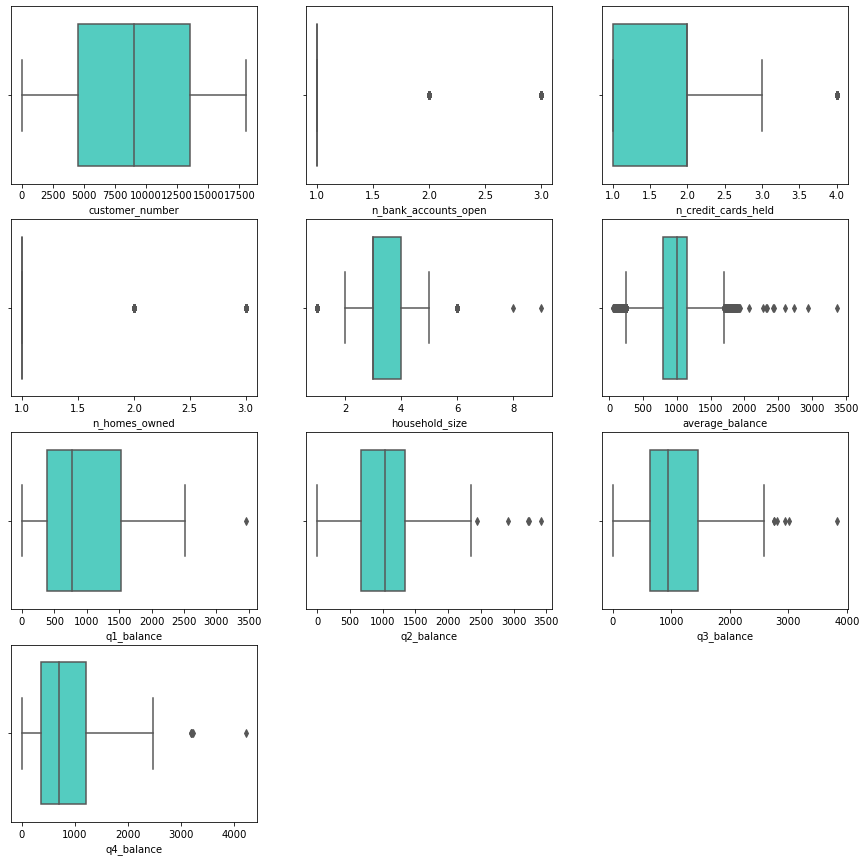

In [74]:
plot_box_grid(X_num)

In [75]:
Y.value_counts()
# The data is very imbalanced

False    16977
True      1023
Name: offer_accepted, dtype: int64

In [ ]:
# Convert to boolean
# Y = Y.astype(bool)

Final definition of X and Y

In [118]:
X = pd.DataFrame(pd.concat([X_num_standardized, X_cat_encoded], axis=1))
X

,0,1,overdraft_protection,own_your_home,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,income_level_High,income_level_Low,income_level_Medium,credit_rating_High,credit_rating_Low,credit_rating_Medium
0,-0.541343,0.121081,False,False,1,0,0,1,0,1,0,0,1,0,0
1,-0.541343,0.121081,False,True,1,0,0,1,0,0,0,1,0,0,1
2,1.575115,0.121081,False,True,1,0,0,0,1,1,0,0,0,0,1
3,1.575115,-1.133645,False,False,1,0,0,1,0,0,0,1,1,0,0
4,-0.541343,0.121081,False,True,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,-0.541343,-1.133645,False,True,0,1,0,1,0,1,0,0,0,1,0
17996,-0.541343,1.375807,False,True,0,1,0,1,0,1,0,0,0,1,0
17997,-0.541343,0.121081,False,False,0,1,0,1,0,1,0,0,0,1,0
17998,-0.541343,2.630533,False,True,0,1,0,1,0,0,0,1,0,0,1


Test-train split

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

Model

In [120]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [121]:
y_predicted = model.predict(X_test)

In [122]:
model.score(X_test, y_predicted)

1.0

In [125]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_predicted)
cm

array([[5085,    0],
       [ 315,    0]], dtype=int64)

In [ ]:
y_predicted = model.predict(X_test)